    Ben Christensen
    Math 347
    2/13/18

Using Monte Carlo Estimation:
1. Estimate volume
2. Estimate a 1-d integral
3. Estimate a 2-d integral
4. Find relative error of monte carlo (n-dimensional) integration

In [1]:
import numpy as np
from scipy import linalg as la
from scipy import stats
from matplotlib import pyplot as plt
# Problem 1
def ball_volume(n, N=10000):
    """Estimate the volume of the n-dimensional unit ball.

    Parameters:
        n (int): The dimension of the ball. n=2 corresponds to the unit circle,
            n=3 corresponds to the unit sphere, and so on.
        N (int): The number of random points to sample.

    Returns:
        (float): An estimate for the volume of the n-dimensional unit ball.
    """
    #Sample in square around unit ball
    points = np.random.uniform(-1, 1, (n, N))
    lengths = la.norm(points, axis=0)
    num_within = np.count_nonzero(lengths < 1)
    return 2**n * (num_within / N)


# Problem 2
def mc_integrate1d(f, a, b, N=10000):
    """Approximate the integral of f on the interval [a,b].

    Parameters:
        f (function): the function to integrate. Accepts and returns scalars.
        a (float): the lower bound of interval of integration.
        b (float): the lower bound of interval of integration.
        N (int): The number of random points to sample.

    Returns:
        (float): An approximation of the integral of f over [a,b].

    Example:
        >>> f = lambda x: x**2
        >>> mc_integrate1d(f, -4, 2)    # Integrate from -4 to 2.
        23.734810301138324              # The true value is 24.
    """
    return (b - a) * np.mean(f(np.random.uniform(a, b, N)))


# Problem 3
def mc_integrate(f, mins, maxs, N=10000):
    """Approximate the integral of f over the box defined by mins and maxs.

    Parameters:
        f (function): The function to integrate. Accepts and returns
            1-D NumPy arrays of length n.
        mins (list): the lower bounds of integration.
        maxs (list): the upper bounds of integration.
        N (int): The number of random points to sample.

    Returns:
        (float): An approximation of the integral of f over the domain.

    Example:
        # Define f(x,y) = 3x - 4y + y^2. Inputs are grouped into an array.
        >>> f = lambda x: 3*x[0] - 4*x[1] + x[1]**2

        # Integrate over the box [1,3]x[-2,1].
        >>> mc_integrate(f, [1, -2], [3, 1])
        53.562651072181225              # The true value is 54.
    """
    V = 1
    n = len(mins)
    dims = np.array([maxs[i] - mins[i] for i in range(n)])
    V = np.product(dims)
    #Generate the sample and scale it
    sample = np.random.uniform(0, 1, (n, N)).T * dims + mins
    return V * np.mean(np.array([f(each) for each in sample]))


# Problem 4
def prob4():
    """Let n=4 and Omega = [-3/2,3/4]x[0,1]x[0,1/2]x[0,1].
    - Define the joint distribution f of n standard normal random variables.
    - Use SciPy to integrate f over Omega.
    - Get 20 integer values of N that are roughly logarithmically spaced from
        10**1 to 10**5. For each value of N, use mc_integrate() to compute 25
        estimates of the integral of f over Omega with N samples, and average
        the estimates together. Compute the relative error of each average.
    - Plot the relative error against the sample size N on a log-log scale.
        Also plot the line 1 / sqrt(N) for comparison.
    """
    #Initialize variables and compute "actual" pdf of normal dist.
    N = np.logspace(1, 5, 20)
    n = 4
    mins = [-1.5, 0, 0, 0]
    maxs = [.75, 1, .5, 1]
    f = lambda x: 1 / (2*np.pi)**(n/2) * np.exp(x@x / -2)
    means, cov = np.zeros(4), np.eye(4)
    actual = stats.mvn.mvnun(mins, maxs, means, cov)[0]
    approximates = []
    rel_errors = []
    #Find montecarlo estimates of the integral of the pdf of the normal dist.
    for i in N:
        estimates = [mc_integrate(f, mins, maxs, int(i)) for j in range(25)]
        estimate = np.mean(estimates)
        approximates.append(estimate)
        rel_errors.append(abs(actual - estimate) / abs(actual))
    #Plot the relative errors
    plt.loglog(N, rel_errors, label="Relative errors")
    plt.plot(N, 1/np.sqrt(N), label="line: 1/sqrt(N)")
    plt.legend(loc="upper right")
    plt.xlabel("N")
    plt.title("Relative error of Monte Carlo Integration")
    plt.show()


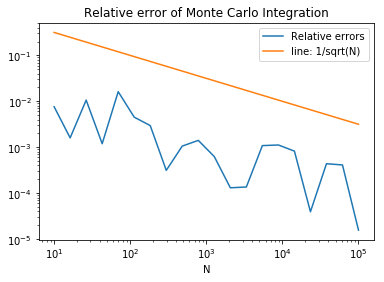

In [2]:
prob4()